<a href="https://colab.research.google.com/github/hyeonjun/AlphaZero/blob/master/5_1_MiniMaxAlgorith_TicTacTo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니맥스법(Minimax alorith)

플레이어는 자신에게 있어서 최선의 수를 선택하고, 상대는 최악의 수를 선택한다는 가정에서 가장 좋은 수를 찾는 탐색 알고리즘이다. 두 사람이 대결하는 유한 확정 완전 정보 게임에서는 미니맥스법을 많이 사용한다.

여기서 유한이란 게임에서 둘 수 있는 수가 유한한 상태를 의미하고, 확정이란 주사위를 던지는 것과 같은 무작위적인 요소가 없는 상태를 말한다. 또한, 완전 정보란 모든 정보가 두 플레이어 모두에게 공개된 상태임을 의미한다.

아래는 현재 국면에서 미래 수(3수 앞까지)의 국면을 조사해 리프 노트(leaf node)의 상태 평가를 계산한 '게임 트리'다.

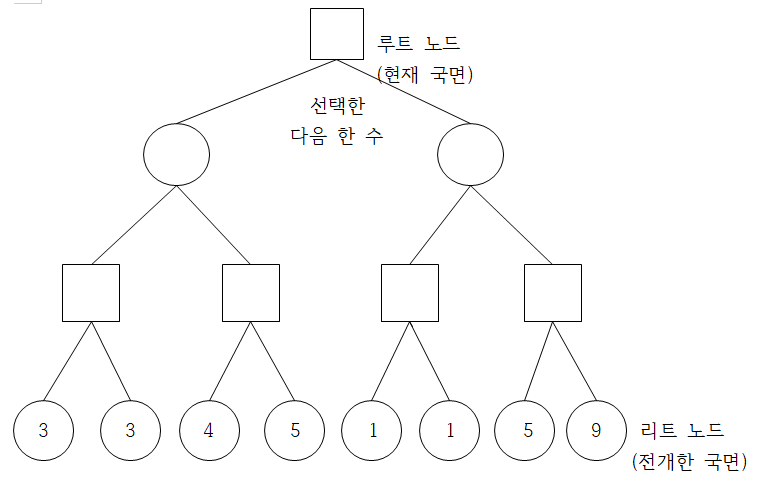

리트 노드의 상태 평가로부터 각 노드의 상태 평가를 다음 규칙에 따라 계산한다.

- 자신의 국면(사각) 노드는 그 자식 노드 상태 평가의 최댓값을 상태 가치로 함.
- 상대방의 국면(원) 노드는 그 자식 노드 상태 평가의 최소값을 상태 가치로 함.

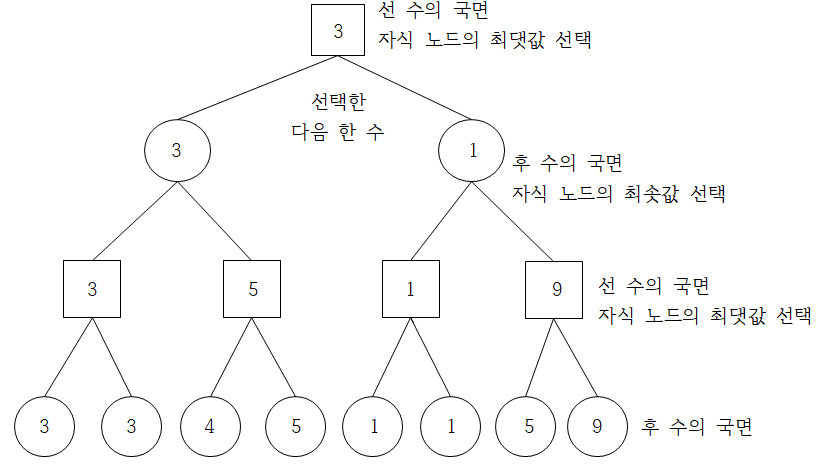

루트 노드의 자식 노드 중에서 평갓값이 높은 노드가 가장 좋은 수가 된다. 여기서는 왼쪽 수가 최선의 수다.

# 틱택토 작성

틱택토 게임 국면을 나타내는 클래스 'State'를 작성

* State의 멤버 변수

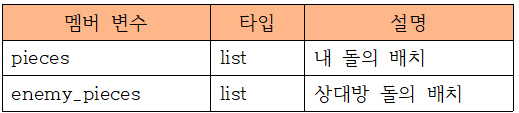

돌은 3*3의 눈금을 길이 9의 배열로 표현한다. 돌이 존재하는 경우는 1, 존재하지 않은 경우는 0이 된다. 아래는 판에서의 위치와 각 숫자의 관계를 나타낸 것이다.

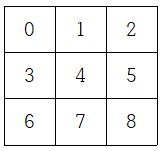

* State 메소드

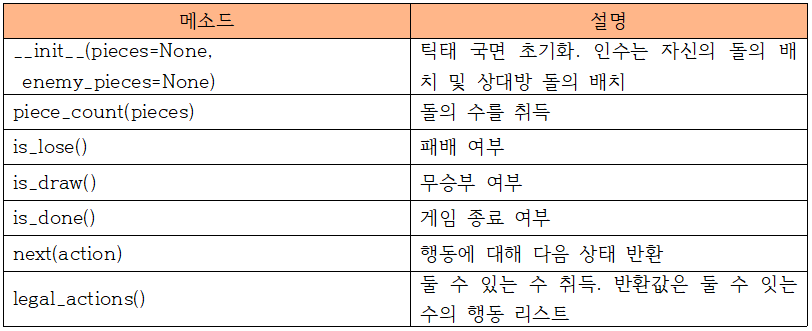

In [ ]:
# 틱택토 생성
import random

# 게임 상태
class State:
  # 초기화
  def __init__(self, pieces=None, enemy_pieces=None):
    # 돌  배치
    self.pieces = pieces if pieces != None else [0] * 9
    self.enemy_pieces = enemy_pieces if enemy_pieces != None else [0] * 9
  
  # 돌의 수 취득
  def piece_count(self, pieces):
    count = 0
    for i in pieces:
      if i == 1:
        count += 1
    return count
  
  # 패배 여부 판정
  def is_lose(self):
    # 돌 3개 연결 여부
    def is_comp(x, y, dx, dy):
      for k in range(3):
        if y<0 or 2<y or x<0 or 2<x or self.enemy_pieces[x + y * 3] == 0:
          return False
        x = x + dx
        y = y + dy
      return True
    
    # 패배 여부 판정
    if is_comp(0,0,1,1) or is_comp(0,2,1,-1):
      return True
    for i in range(3):
      if is_comp(0,i,1,0) or is_comp(i,0,0,1):
        return True
    return False

  # 무승부 여부 판정
  def is_draw(self):
    return self.piece_count(self.pieces) + self.piece_count(self.enemy_pieces) == 9
  
  # 게임 종료 여부 판정
  def is_done(self):
    return self.is_lose() or self.is_draw()

  # 다음 상태 얻기
  # next()는 행동에 따라 다음 상태를 취득한다. 행동은 돌을 배치하는 매스의 위치를 0~8의 숫자로 지정.
  def next(self, action):
    pieces = self.pieces.copy()
    pieces[action] = 1
    return State(self.enemy_pieces, pieces)
  
  # 둘 수 있는 수의 리스트 얻기
  # legal_actions()는 둘 수 있는 수의 리스트, 즉 선택 가능한 행동을 의미. 틱택토에서는 비어있는 위치 모두가 해당.
  def legal_actions(self):
    actions = []
    for i in range(9):
      if self.pieces[i] == 0 and self.enemy_pieces[i] == 0:
        actions.append(i)
    return actions

  # 선 수 여부 판정
  def is_first_player(self):
    return self.piece_count(self.pieces) == self.piece_count(self.enemy_pieces)
  
  # 문자열 표시
  def __str__(self):
    ox = ('o','x') if self.is_first_player() else ('x','o')
    str = ''
    for i in range(9):
      if self.pieces[i] == 1:
        str += ox[0]
      elif self.enemy_pieces[i] == 1:
        str += ox[1]
      else:
        str += '-'
      if i%3 == 2:
        str += '\n'
    return str

# 랜덤 행동 선택

무작위로 행동을 선택하는 함수. legal_actions()에서 둘 수 있는 수의 리스트를 얻어, 그 중 무작위로 수를 선택한다.

In [ ]:
# 랜덤 행동 선택
def random_action(state):
  legal_actions = state.legal_actions()
  return legal_actions[random.randint(0, len(legal_actions)-1)]

# 랜덤 대 랜덤의 대전

랜덤과 랜덤으로 틱택토를 대전시킨다. 게임 종료까지 '행동 얻기'와 '다음 상태 얻기'를 반복시키면서 정상적으로 동작하는지 확인한다.

In [ ]:
# 랜덤 vs 랜덤

# 상태 생성
state = State()

# 게임 종료 시 까지 반복
while True:
  # 게임 종료 시
  if state.is_done():
    break
  
  # 행동 얻기
  action = random_action(state)

  # 다음 상태 얻기
  state = state.next(action)

  # 문자열 표시(게임 진행 상태)
  print(state)
  print()

---
---
--o


---
--x
--o


---
-ox
--o


---
-ox
-xo


--o
-ox
-xo


--o
xox
-xo


--o
xox
oxo




# 미니맥스법을 활용한 상태 가치 계산

미니맥스법으로 상태(국면)의 가치를 계산하는 함수를 작성한다. State를 전달하면 상태 가치(클수록 승리 확률이 높은 값)를 반환한다.

* 게임이 종료된 경우

상태가 게임 종료인 경우에는 상태 가치 '-1: 패배, 0: 무승부'를 반환한다.

* 게임이 종료되지 않는 경우

상태가 게임이 종료되지 않으면 둘 수 있는 수별로 상태 가치를 계산하고, 그 최댓값을 반환한다. 둘 수 있는 수의 상태 가치는 재귀적으로 게임이 종료될 때까지 조사해 계산한다.

미니맥스법에서는 선 수(자신)는 자신에게 가치가 높은 수를 선택하고, 후 수(상대)는 선 수에 대해 가치가 낮은 수를 선택한다. 여기에서 가능한 상태 가치를 얻을 때 부호를 반전시킴으로써 선 수와 같이 후 수에도 가치가 높은 수를 선택하면 좋은 경우가 된다.

즉, 'score = -mini_max(state.next(action))'과 같이 부호를 반전시킴으로써 선/후 수에 관계없이 상태 가치의 최댓값을 반환하도록 한다. 미니맥스법을 간단하게 구현하는 이 방법을 네가티브맥스법(Negative-max algorithm)이라고 부른다.

게임이 종료될 때까지 이를 재귀적으로 조사해서 계산하는 작업에 대한 비용이 꽤 높지 않을 것으로 우려할 수 있는데, 실제로 현재 국면에서부터 가능한 모든 수를 전개하게 되므로 틱택토와 같이 작은 규모의 게임에는 괜찮지만, 장기나 체스와 같이 국면이 많은 게임에서는 막대한 시간이 소요되며, 현실적이지도 않다.

이에 대한 대책은 바로 '원시 몬테카를로 탐색'이다.
이것은 다음에 하도록 한다.

In [ ]:
# 미니맥스법을 활용한 상태 가치 계산
def mini_max(state):
  # 패배 시 상태 가치 -1
  if state.is_lose():
    return -1
  
  # 무승부 시 상태 가치 0
  if state.is_draw():
    return 0

  # 둘 수 있는 수의 상태 가치 계산
  best_score = -float('inf')
  for action in state.legal_actions():
    score = -mini_max(state.next(action))
    if score > best_score:
      best_score = score
  
  # 둘 수 있는 수의 상태 가치값 중 최댓값 선택
  return best_score

# 미니맥스법을 활용한 행동 선택
미니맥스법을 활용해 상태(국면)에 맞춰 행동을 반환하는 함수를 작성. State를 전달하면 행동(돌을 놓는 매스:0~8)을 반환한다.

둘 수 있는 수별로 상태 가치를 계산하고, 그 최댓값을 갖는 행동을 선택한다.


In [ ]:
# 미니맥스법을 활용한 행동 선택
def mini_max_action(state):
  # 둘 수 있는 수의 상태 가치 계산
  best_action = 0
  best_score = -float('inf')
  str = ['','']
  for action in state.legal_actions():
    score = -mini_max(state.next(action))
    if score > best_score:
      best_action = action
      best_score = best_score

    str[0] = '{}{:2d},'.format(str[0], action)
    str[1] = '{}{:2d},'.format(str[1], score)
  print('action:', str[0], '\nscore:',str[1], '\n')

  # 둘 수 있는 수의 상태 가치 최댓값을 가진 행동 반환
  return best_action

# 미니맥스법과 랜덤의 대전
선 수는 mini_max_action()을, 후 수는 random_action()을 사용한다.
여러 차례 실행해서 선 수(o)가 사용한 미니맥스법이 더 강한지 확인해보자.


In [ ]:
# 미니맥스법과 랜덤의 대전

# 상태 생성
state = State()
count = 1
victory = 0
# 게임 종료 시 까지 반복
print("게임 수 : ",count)
while True:
  # 게임 종료 시
  if state.is_done():
    count += 1
    print("게임 수 : ",count)
    if state.is_draw != True and state.is_lose != True:
      victory +=1
      state = State()
    if victory > 5: 
      break

  # 행동 얻기
  if state.is_first_player():
    action = mini_max_action(state)
  else:
    action = random_action(state)

  # 다음 상태 얻기
  state = state.next(action)

  # 문자열 표시
  
  print(state)
  print()

게임 수 :  1
action:  0, 1, 2, 3, 4, 5, 6, 7, 8, 
score:  0, 0, 0, 0, 0, 0, 0, 0, 0, 

---
---
--o


--x
---
--o


action:  0, 1, 3, 4, 5, 6, 7, 
score:  1, 0, 0, 0,-1, 1, 1, 

--x
---
-oo


--x
-x-
-oo


action:  0, 1, 3, 5, 6, 
score: -1,-1,-1,-1, 1, 

--x
-x-
ooo


게임 수 :  2
action:  0, 1, 2, 3, 4, 5, 6, 7, 8, 
score:  0, 0, 0, 0, 0, 0, 0, 0, 0, 

---
---
--o


---
-x-
--o


action:  0, 1, 2, 3, 5, 6, 7, 
score:  0, 0, 0, 0, 0, 0, 0, 

---
-x-
-oo


---
xx-
-oo


action:  0, 1, 2, 5, 6, 
score: -1,-1,-1, 1, 1, 

---
xx-
ooo


게임 수 :  3
action:  0, 1, 2, 3, 4, 5, 6, 7, 8, 
score:  0, 0, 0, 0, 0, 0, 0, 0, 0, 

---
---
--o


-x-
---
--o


action:  0, 2, 3, 4, 5, 6, 7, 
score:  0, 1, 0, 1,-1, 1, 0, 

-x-
---
-oo


-xx
---
-oo


action:  0, 3, 4, 5, 6, 
score:  1,-1,-1,-1, 1, 

-xx
---
ooo


게임 수 :  4
action:  0, 1, 2, 3, 4, 5, 6, 7, 8, 
score:  0, 0, 0, 0, 0, 0, 0, 0, 0, 

---
---
--o


x--
---
--o


action:  1, 2, 3, 4, 5, 6, 7, 
score:  0, 1, 0, 0,-1, 1,-1, 

x--
---
-oo


x--
---
xoo


